In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores , 2))
print(' 5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores , 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores:  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423


In [6]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('###',model.__class__.__name__,'###')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

### DecisionTreeRegressor ###
 5 교차 검증의 평균 RMSE : 5.978
### RandomForestRegressor ###
 5 교차 검증의 평균 RMSE : 4.423
### GradientBoostingRegressor ###
 5 교차 검증의 평균 RMSE : 4.269


<AxesSubplot:>

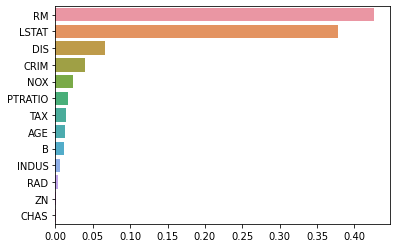

In [8]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
# y_target = bostonDF['PRICE']
# X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf_reg.fit(X_data,y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


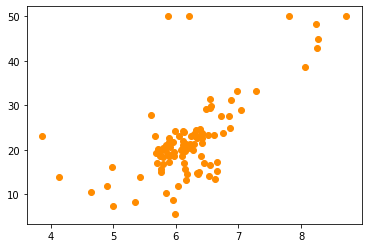

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressior 생성, DecisionTreeRegressor의 max_depth는 각각 2 ,7
lr_reg = LinearRegression()
rf_reg_2 = DecisionTreeRegressor(max_depth = 2)
rf_reg_7 = DecisionTreeRegressor(max_depth = 7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5,8.5, 0.04).reshape(-1,1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

In [13]:
#학습과 예측 수행.
lr_reg.fit(X_feature,y_target)
rf_reg_2.fit(X_feature,y_target)
rf_reg_7.fit(X_feature,y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf_2 = rf_reg_2.predict(X_test)
pred_rf_7 = rf_reg_7.predict(X_test)

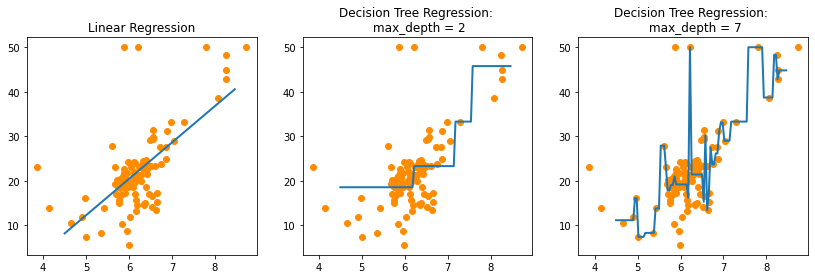

In [15]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols = 3)

# x축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr,label='linear', linewidth = 2)

# 선형 회귀로 학습된 모델 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf_2,label='max_depth:2', linewidth = 2)

# 선형 회귀로 학습된 모델 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf_7,label='max_depth:7', linewidth = 2)